<a href="https://colab.research.google.com/github/khamsaen2543/Portfolio_Data-Engineer/blob/main/Sales_Insight_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ชุดข้อมูลตัวอย่างนำมาจาก https://catalog.data.gov/dataset/warehouse-and-retail-sales

## ขั้นตอนการทำโปรเจ็กต์ **Sales Insight Analyzer**
1. เตรียมข้อมูล
ดาวน์โหลดหรือสร้างไฟล์ CSV ที่มีข้อมูลยอดขาย
ใช้ Python ในการอ่านและจัดการข้อมูล (เช่น Pandas)
2. วิเคราะห์ข้อมูล
ยอดขายรวม (Total Sales) = Price * Quantity
ยอดขายต่อหมวดหมู่ (Sales by Category)
สินค้ายอดนิยม (Top Products)
3. แสดงผลในรูปแบบกราฟ
ใช้ไลบรารีเช่น Matplotlib หรือ Seaborn ในการสร้างกราฟ
4. สร้าง Dashboard
ใช้เครื่องมือเช่น Tableau หรือ Power BI เพื่อสร้าง Dashboard ที่สามารถอัปเดตได้

# ขั้นตอนการวิเคราะห์



## 1. นำเข้าข้อมูล

In [1]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks'

### import pandas as pd: นำเข้าไลบรารี Pandas ซึ่งช่วยจัดการข้อมูลในรูปแบบตาราง (DataFrame)
### data.head(): แสดง 5 แถวแรกของข้อมูลเพื่อดูโครงสร้าง
### คลิกลิ้ง -> เลือก E-mail -> ลงชื่อ -> ก็อปโค้ด -> นำกลับมาวาง -> enter

Mounted at /content/drive


In [2]:
path = '/content/drive/My Drive/Colab Notebooks'
data_sales = pd.read_csv(os.path.join(path,'Warehouse_and_Retail_Sales.csv'))
data_sales

### pd.read_csv("sales_data.csv"): อ่านข้อมูลจากไฟล์ CSV และแปลงให้เป็น DataFrame

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.00
...,...,...,...,...,...,...,...,...,...
307640,2020,9,DOPS INC,97896,ST PETERS ORGANIC ENG ALE NR 12/CS - 16.9OZ,BEER,0.00,0.0,1.00
307641,2020,9,ANHEUSER BUSCH INC,97918,STELLA ARTOIS 2/12 NR - 11.2OZ,BEER,372.45,315.0,3586.88
307642,2020,9,HEINEKEN USA,97942,TECATE 4/6 LNNR - 12OZ,BEER,7.79,0.0,4.00
307643,2020,9,RELIABLE CHURCHILL LLLP,97950,S SMITH WINTER WELCOME NR 12/CS - 18.7OZ,BEER,0.00,0.0,2.00


# **Data structure**

---

index	ลำดับข้อมูล

---

YEAR	ปีที่ทำการขาย

---

MONTH	เดือนที่ทำการขาย

---

SUPPLIER	ชื่อผู้จัดจำหน่ายสินค้า

---

ITEM CODE	รหัสสินค้า

---

ITEM DESCRIPTION	คำอธิบายสินค้า

---

ITEM TYPE	ประเภทสินค้า

---

RETAIL SALES	ยอดขายปลีก

---

RETAIL TRANSFERS	การโอนสินค้าระหว่างร้านค้า

---

WAREHOUSE SALES	ยอดขายจากคลังสินค้า

---

In [4]:
print(data_sales.head())                      ### ดูข้อมูลตัวอย่าง

   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  
0               0.0              2.0  
1               1.0              4.0  
2               0.0              1.0  
3               0.0              1.0  
4               0.0          

## 2. วิเคราะห์ข้อมูลพื้นฐาน
###1.  ยอดขายรวมทุกช่องทาง
### คำนวณยอดขายทั้งหมดรวมกัน



In [6]:
data_sales['TOTAL SALES'] = data_sales['RETAIL SALES'] + data_sales['WAREHOUSE SALES']      ###คำนวณยอดขายทั้งหมดรวมกัน:
total_sales = data_sales['TOTAL SALES'].sum()
print(f"Total Sales: {total_sales}")

###  data_sales['RETAIL SALES'] +  data_sales['WAREHOUSE SALES']: คำนวณยอดขายรวมโดยรวมยอดขายจากร้านค้า (RETAIL SALES) และคลังสินค้า (WAREHOUSE SALES)
###  data_sales['TOTAL SALES']: สร้างคอลัมน์ใหม่ใน DataFrame ชื่อว่า TOTAL SALES เพื่อเก็บผลลัพธ์
###  data_sales['TOTAL SALES'].sum(): คำนวณยอดขายรวมทั้งหมด (รวมทุกแถวในคอลัมน์ TOTAL SALES)
### f"Total Sales: {total_sales}": ใช้ฟังก์ชัน f-string เพื่อพิมพ์ผลลัพธ์ออกมา

Total Sales: 9942655.649999999


### 2. ยอดขายรายเดือน
### วิเคราะห์ยอดขายตามเดือน

In [8]:
sales_by_month = data_sales.groupby(['YEAR', 'MONTH'])['TOTAL SALES'].sum()
print(sales_by_month)
### data_sales.groupby(['YEAR', 'MONTH']): จัดกลุ่มข้อมูลตามปี (YEAR) และเดือน (MONTH)
### ['TOTAL SALES'].sum(): รวมยอดขาย (TOTAL SALES) ในแต่ละกลุ่ม
### ผลลัพธ์จะแสดงยอดขายรวมสำหรับแต่ละปีและเดือน

YEAR  MONTH
2017  6        476748.09
      7        409478.58
      8        469298.47
      9        395893.13
      10       392951.87
      11       437621.85
      12       438591.71
2018  1        330309.44
      2        342812.65
2019  1        356481.77
      2        328701.22
      3        377701.76
      4        379183.45
      5        478744.68
      6        437447.47
      7        465734.96
      8        440231.70
      9        400172.23
      10       438433.44
      11       400729.75
2020  1        358433.49
      3        426864.27
      7        512633.38
      9        447456.29
Name: TOTAL SALES, dtype: float64


### 3. สินค้าขายดี
### หาสินค้าที่มียอดขายสูงสุด

In [11]:
top_items = data_sales.groupby ('ITEM DESCRIPTION')['TOTAL SALES'].sum().sort_values(ascending=False).head(10)
print(top_items)

### data_sales.groupby('ITEM DESCRIPTION'): จัดกลุ่มข้อมูลตามชื่อสินค้า (ITEM DESCRIPTION)
### ['TOTAL SALES'].sum(): รวมยอดขายของแต่ละสินค้า
### sort_values(ascending=False): จัดเรียงจากมากไปน้อย
### head(10): เลือกเฉพาะ 10 อันดับแรก

ITEM DESCRIPTION
CORONA EXTRA LOOSE NR - 12OZ          328224.83
CORONA EXTRA 2/12 NR - 12OZ           257679.62
HEINEKEN LOOSE NR - 12OZ              189711.21
HEINEKEN 2/12 NR - 12OZ               162224.15
MILLER LITE 30PK CAN - 12OZ           148926.40
CORONA EXTRA 4/6 NR - 12OZ            132665.61
MODELO ESPECIAL 24 LOOSE NR - 12OZ    121846.80
BUD LIGHT 30PK CAN                    108615.97
HEINEKEN 4/6 NR - 12OZ                105184.92
CORONA EXTRA 18PK NR - 12OZ           100664.44
Name: TOTAL SALES, dtype: float64


### 4. ยอดขายตาม Supplier
### วิเคราะห์ยอดขายตามผู้จัดจำหน่าย

In [13]:
sales_by_month = data_sales.groupby('SUPPLIER')['TOTAL SALES'].sum().sort_values(ascending=False)
print(sales_by_month)

### data_sales.groupby('SUPPLIER'): จัดกลุ่มข้อมูลตาม Supplier
### ['TOTAL SALES'].sum(): รวมยอดขายจากแต่ละ Supplier
### sort_values(ascending=False): จัดเรียงยอดขายจากมากไปน้อย

SUPPLIER
CROWN IMPORTS               1736309.17
MILLER BREWING COMPANY      1512585.15
ANHEUSER BUSCH INC          1441131.66
HEINEKEN USA                 885936.37
E & J GALLO WINERY           363634.31
                               ...    
THE DOG BEVERAGE CO INC           0.04
KAHN PAPER COMPANY INC            0.00
HAMCO DC                          0.00
PACIFIC RIM WINEMAKERS            0.00
PREMIUM DISTRIBUTORS INC     -53782.00
Name: TOTAL SALES, Length: 396, dtype: float64


## 3. การแสดงผล
### 1.กราฟยอดขายรายเดือน

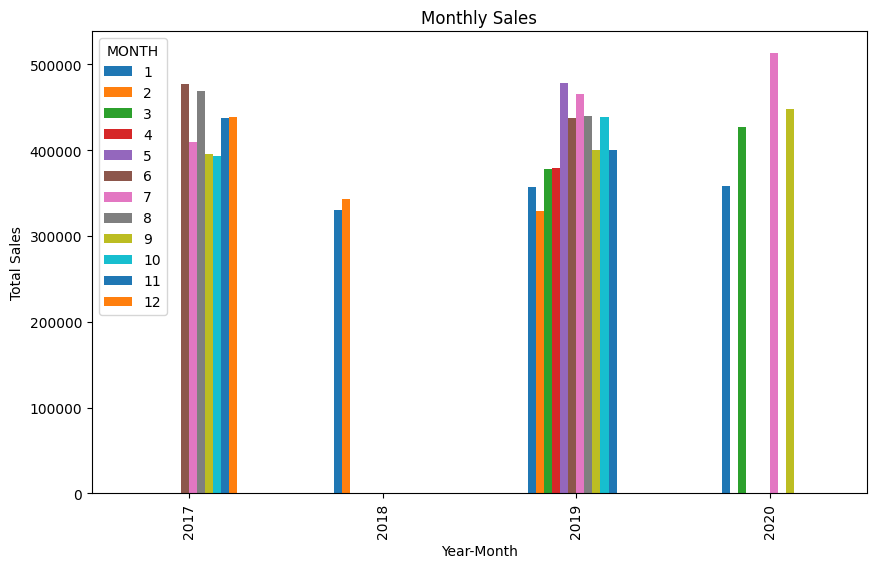

In [23]:
import matplotlib.pyplot as plt

sales_by_month = data_sales.groupby(['YEAR', 'MONTH'])['TOTAL SALES'].sum()

sales_by_month.unstack().plot(kind='bar', figsize=(10, 6))
plt.title("Monthly Sales")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.show()

### นิยามใหม่หรือปรับโครงสร้างตัวแปร sales_by_month เพื่อการวิเคราะห์รายเดือน
### import matplotlib.pyplot as plt: นำเข้าไลบรารีสำหรับสร้างกราฟ
### sales_by_month.unstack(): เปลี่ยนกลุ่มข้อมูล (YEAR และ MONTH) ให้แสดงในรูปแบบตารางเพื่อวาดกราฟ
### plot(kind='bar'): วาดกราฟแท่ง (Bar Chart)
### figsize=(10, 6): กำหนดขนาดของกราฟ
### plt.title, plt.xlabel, plt.ylabel: กำหนดชื่อกราฟและแกน
### plt.show(): แสดงผลกราฟ

### 2. กราฟยอดขายตามประเภทสินค้า

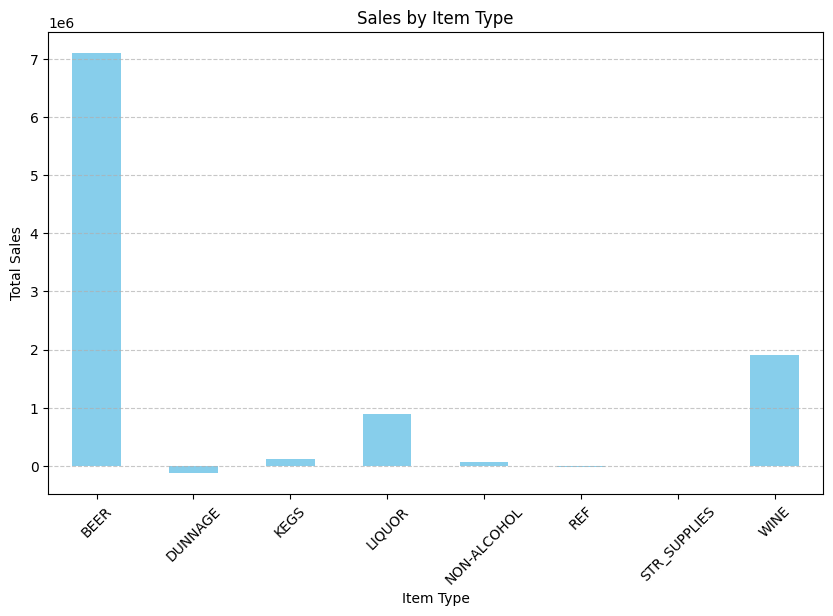

In [32]:
### สร้างกราฟแท่ง (Bar Chart)
sales_by_item_type.plot(
    kind='bar',
    color='skyblue',
    figsize=(10, 6)
)
plt.title("Sales by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)  ### หมุนชื่อประเภทสินค้าให้เอียง
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### data_sales.groupby('ITEM TYPE'): จัดกลุ่มข้อมูลตามประเภทสินค้า (ITEM TYPE)
### ['TOTAL SALES'].sum(): รวมยอดขายในแต่ละประเภท
### plot(kind='pie', autopct='%1.1f%%'): วาดกราฟวงกลม (Pie Chart) และแสดงเปอร์เซ็นต์
### figsize=(8, 8): กำหนดขนาดกราฟ
### plt.title("Sales by Item Type"): ตั้งชื่อกราฟ

# สรุป

---


## 1. นำเข้าข้อมูล: อ่านและเตรียมข้อมูล

---


## 2. วิเคราะห์: คำนวณยอดขาย, หาสินค้าขายดี, วิเคราะห์ตาม Supplier และประเภทสินค้า

---


## 3. แสดงผล: ใช้กราฟเพื่อช่วยสื่อสารข้อมูล

---

